# Predicting qualities of Dubai Properties 

# Using Decision Tree Classifier

In here we are trying to check whether the quality of the given property is low, medium, high or ultra based on the other associate
characteristics of the property. 

Step1 : Data Preprocessing 

Processing the dataset in order to ensure performance of the model.

Step 1.1 -  Installing necessary libraries

In [1]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Step 1.2 - Reading the dataset into the environment

In [5]:

dataset = pd.read_csv('properties_data.csv')
dataset.head()


,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


Step 1.3 - Checking Null Values

Here what we do is we check whether if any of the data columns have considerable amount of null values, in order to get the next necessary action (
    like filling the null values or dropping out that entire column.
)

In [6]:
dataset.isna().sum()

id                     0
neighborhood           0
latitude               0
longitude              0
price                  0
size_in_sqft           0
price_per_sqft         0
no_of_bedrooms         0
no_of_bathrooms        0
quality                0
maid_room              0
unfurnished            0
balcony                0
barbecue_area          0
built_in_wardrobes     0
central_ac             0
childrens_play_area    0
childrens_pool         0
concierge              0
covered_parking        0
kitchen_appliances     0
lobby_in_building      0
maid_service           0
networked              0
pets_allowed           0
private_garden         0
private_gym            0
private_jacuzzi        0
private_pool           0
security               0
shared_gym             0
shared_pool            0
shared_spa             0
study                  0
vastu_compliant        0
view_of_landmark       0
view_of_water          0
walk_in_closet         0
dtype: int64

Since our dataset's any of the columns don't contain any null value, we proceeded with the next step.

Here what we displayed the data type of the each data column.

In [7]:
result = dataset.dtypes
print(result)

id                       int64
neighborhood            object
latitude               float64
longitude              float64
price                    int64
size_in_sqft             int64
price_per_sqft         float64
no_of_bedrooms           int64
no_of_bathrooms          int64
quality                 object
maid_room                 bool
unfurnished               bool
balcony                   bool
barbecue_area             bool
built_in_wardrobes        bool
central_ac                bool
childrens_play_area       bool
childrens_pool            bool
concierge                 bool
covered_parking           bool
kitchen_appliances        bool
lobby_in_building         bool
maid_service              bool
networked                 bool
pets_allowed              bool
private_garden            bool
private_gym               bool
private_jacuzzi           bool
private_pool              bool
security                  bool
shared_gym                bool
shared_pool               bool
shared_s

Step 1.4 - Converting data types

Since neighborhood and quality columns in the object data type, we are converting them to categorical values, in order to make it easy for us to use that in our model without any difficulties.

In [8]:
dataset = dataset.astype({'neighborhood': 'category', 'quality': 'category'})
dataset.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


After converting the data types, we can see that the data types of neighborhood and quality are changed to category.

In [9]:
result = dataset.dtypes
print(result)

id                        int64
neighborhood           category
latitude                float64
longitude               float64
price                     int64
size_in_sqft              int64
price_per_sqft          float64
no_of_bedrooms            int64
no_of_bathrooms           int64
quality                category
maid_room                  bool
unfurnished                bool
balcony                    bool
barbecue_area              bool
built_in_wardrobes         bool
central_ac                 bool
childrens_play_area        bool
childrens_pool             bool
concierge                  bool
covered_parking            bool
kitchen_appliances         bool
lobby_in_building          bool
maid_service               bool
networked                  bool
pets_allowed               bool
private_garden             bool
private_gym                bool
private_jacuzzi            bool
private_pool               bool
security                   bool
shared_gym                 bool
shared_p

checking what are the categories we have inside the "neighborhood" and "quality" data columns

In [10]:
categories = dataset['neighborhood'].cat.categories
print(categories)

Index(['Al Barari', 'Al Barsha', 'Al Furjan', 'Al Kifaf', 'Al Quoz',
       'Al Sufouh', 'Arjan', 'Barsha Heights (Tecom)', 'Bluewaters',
       'Business Bay', 'City Walk', 'Culture Village', 'DAMAC Hills', 'DIFC',
       'Discovery Gardens', 'Downtown Dubai',
       'Dubai Creek Harbour (The Lagoons)', 'Dubai Festival City',
       'Dubai Harbour', 'Dubai Healthcare City', 'Dubai Hills Estate',
       'Dubai Land', 'Dubai Marina', 'Dubai Production City (IMPZ)',
       'Dubai Residence Complex', 'Dubai Silicon Oasis',
       'Dubai South (Dubai World Central)', 'Dubai Sports City',
       'Falcon City of Wonders', 'Green Community', 'Greens',
       'International City', 'Jebel Ali', 'Jumeirah',
       'Jumeirah Beach Residence', 'Jumeirah Golf Estates',
       'Jumeirah Lake Towers', 'Jumeirah Village Circle',
       'Jumeirah Village Triangle', 'Meydan', 'Mina Rashid', 'Mirdif',
       'Mohammed Bin Rashid City', 'Motor City', 'Mudon', 'Old Town',
       'Palm Jumeirah', 'Remraam',

In [11]:
categories = dataset['quality'].cat.categories
print(categories)

Index(['High', 'Low', 'Medium', 'Ultra'], dtype='object')


It is visible that "neighborhood" column has more than 10 different catogories and some of them does not contain data records more than 20.

In [12]:
dataset['neighborhood'].value_counts()

neighborhood
Downtown Dubai                       302
Dubai Marina                         288
Jumeirah Village Circle              200
Palm Jumeirah                        178
Jumeirah Beach Residence             116
Business Bay                          97
Jumeirah Lake Towers                  70
Dubai Hills Estate                    53
The Views                             47
Jumeirah                              39
Dubai Creek Harbour (The Lagoons)     38
Mohammed Bin Rashid City              31
DIFC                                  31
Dubai Harbour                         30
Greens                                30
Motor City                            27
Town Square                           27
Dubai Sports City                     25
Al Furjan                             23
DAMAC Hills                           21
Meydan                                17
Old Town                              17
City Walk                             14
Umm Suqeim                            13
Dub

Step 1.5 - Dropping unncecessary columns

Since the column neigborhood has more than ten categories and some of them contains less records, so we gonna drop that column,
and the latitude and longitude related with the location and since we are dropping the neighbourhood we gonna drop those columns too,
to avoid the model complexity.

and the ID of the record does not contain any predictive power, we can drop that column too.

so we will be dropping, [neighborhood,longitude,latitude,id]

In [13]:
dataset2 = dataset.drop(['neighborhood', 'longitude', 'latitude','id'], axis=1)

In [14]:
dataset2.head()

,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,2700000,1079,2502.32,1,2,Medium,False,False,True,True,...,False,False,True,False,False,False,False,False,True,False
1,2850000,1582,1801.52,2,2,Medium,False,False,True,False,...,False,False,True,True,False,False,False,False,True,False
2,1150000,1951,589.44,3,5,Medium,True,True,True,False,...,False,True,True,True,False,False,False,True,True,True
3,2850000,2020,1410.89,2,3,Low,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1729200,507,3410.65,0,1,Medium,False,False,False,False,...,False,True,True,True,True,False,False,True,True,False


Step 1.6 - Encoding category labels to numerical values

Encoding the quality column

1 - Low
2 - Medium
3 - High
4 - Ultra


In [15]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder() 
dataset2['quality'] = label_encoder.fit_transform(dataset2['quality']) 

In [16]:
dataset2.head()

,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,2700000,1079,2502.32,1,2,2,False,False,True,True,...,False,False,True,False,False,False,False,False,True,False
1,2850000,1582,1801.52,2,2,2,False,False,True,False,...,False,False,True,True,False,False,False,False,True,False
2,1150000,1951,589.44,3,5,2,True,True,True,False,...,False,True,True,True,False,False,False,True,True,True
3,2850000,2020,1410.89,2,3,1,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1729200,507,3410.65,0,1,2,False,False,False,False,...,False,True,True,True,True,False,False,True,True,False


Encoding other data columns which have labels ( True and False).

True - 1, False - 0

In [17]:
le = LabelEncoder()
dataset_encoded = dataset2.iloc[:,6:34]

for i in dataset_encoded:
    dataset2[i] = le.fit_transform(dataset_encoded[i])

dataset2.head()

,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,2700000,1079,2502.32,1,2,2,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
1,2850000,1582,1801.52,2,2,2,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
2,1150000,1951,589.44,3,5,2,1,1,1,0,...,0,1,1,1,0,0,0,1,1,1
3,2850000,2020,1410.89,2,3,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1729200,507,3410.65,0,1,2,0,0,0,0,...,0,1,1,1,1,0,0,1,1,0


Since the 'price_per_sqft' column is in float data type, for both our and user's easiness, we are converting it to a int data type.

In [18]:

dataset2['price_per_sqft'] = dataset2['price_per_sqft'].astype(int)
dataset2.head()

,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,2700000,1079,2502,1,2,2,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
1,2850000,1582,1801,2,2,2,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
2,1150000,1951,589,3,5,2,1,1,1,0,...,0,1,1,1,0,0,0,1,1,1
3,2850000,2020,1410,2,3,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1729200,507,3410,0,1,2,0,0,0,0,...,0,1,1,1,1,0,0,1,1,0


#normalizing the price column and size_in_sqft

In [19]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#dataset2['price']= sc.fit_transform(dataset2['price'].values.reshape(-1,1))

In [20]:
#dataset2.head()

In [21]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#dataset2['size_in_sqft']= sc.fit_transform(dataset2['size_in_sqft'].values.reshape(-1,1))

In [22]:
#dataset2.head()

In [23]:
#from sklearn.cluster import KMeans
#wcss = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#    kmeans.fit(dataset2)
#    wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), wcss)
#plt.title('The Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [24]:
#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
#y_kmeans = kmeans.fit_predict(dataset2)


In [25]:
#Create a scatter plot for each cluster
#plt.scatter(dataset2[y_kmeans == 0, 0], dataset2[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
#plt.scatter(dataset2[y_kmeans == 1, 0], dataset2[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
#plt.scatter(dataset2[y_kmeans == 2, 0], dataset2[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
#plt.scatter(dataset2[y_kmeans == 3, 0], dataset2[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
#plt.title('Clusters of Propeties based on the Quality')
#plt.xlabel('Annual Income (k$)')
#plt.ylabel('Spending Score (1-100)')
#plt.legend()
#plt.show()

Step 1.7 - Rearraging columns

Since in this Classification Model, our response varibale is 'Quality' we put it as the last column, so that is why we rearrange the dataset

In [26]:
columns = ['price', 'size_in_sqft','price_per_sqft','no_of_bedrooms', 'no_of_bathrooms' ,'maid_room' ,'unfurnished' ,            
               'balcony' , 'barbecue_area' , 'built_in_wardrobes', 'central_ac' ,'childrens_play_area' ,'childrens_pool' ,         
                'concierge' , 'covered_parking','kitchen_appliances' ,'lobby_in_building','maid_service' ,'networked',
                'pets_allowed' ,'private_garden' ,'private_gym' ,'private_jacuzzi' ,'private_pool' ,'security' ,'shared_gym' ,  
                'shared_pool' ,'shared_spa' ,'study' ,'vastu_compliant' ,'view_of_landmark' ,'view_of_water' ,'walk_in_closet' ,
                'quality']           
dataset2 = dataset2[columns]

In [27]:
dataset2.head()

,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,...,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet,quality
0,2700000,1079,2502,1,2,0,0,1,1,0,...,0,1,0,0,0,0,0,1,0,2
1,2850000,1582,1801,2,2,0,0,1,0,1,...,0,1,1,0,0,0,0,1,0,2
2,1150000,1951,589,3,5,1,1,1,0,1,...,1,1,1,0,0,0,1,1,1,2
3,2850000,2020,1410,2,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1729200,507,3410,0,1,0,0,0,0,1,...,1,1,1,1,0,0,1,1,0,2


Now the data processing part is completed. We have remove unncessary data columns that can add a complexity to our model, then we convert data types and encodes label values to numerical values.

Our dataset is now ready to use in our model.

Step 2 - Defining the dependent and independent variables

In our dataset there are 34 variables.

In this classification model, our dependent variable is 'Quality', while other 33 columns are independent variables.

In [28]:
X = dataset2.iloc[:,0:33].values
Y = dataset2.iloc[:,-1].values

Step 3 - Splitting the dataset into test and training dataset

80% of the records will be use for training while 20% of records use to test the model

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=100)

In [31]:
print(X_train)

[[1550000    1777     872 ...       0       0       0]
 [ 740000     725    1020 ...       1       0       1]
 [1650000    1325    1245 ...       0       1       0]
 ...
 [1005888    1073     937 ...       0       0       0]
 [1890000    1277    1480 ...       0       1       0]
 [1900000    1300    1461 ...       0       0       0]]


In [32]:
print(Y_train)

[1 2 2 ... 2 2 2]


In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
print(X_train)

[[-0.18827485  0.43517284 -0.68280523 ... -0.5073714  -0.72914902
  -0.42375295]
 [-0.4863642  -0.80844585 -0.46206904 ...  1.97094277 -0.72914902
   2.35986557]
 [-0.1514737  -0.09915762 -0.12649036 ... -0.5073714   1.37146176
  -0.42375295]
 ...
 [-0.38851434 -0.39705868 -0.58586028 ... -0.5073714  -0.72914902
  -0.42375295]
 [-0.06315093 -0.15590068  0.22400293 ... -0.5073714   1.37146176
  -0.42375295]
 [-0.05947081 -0.1287113   0.19566517 ... -0.5073714  -0.72914902
  -0.42375295]]


In [35]:
print(X_test)

[[-0.11467254 -0.26347606  0.21654562 ... -0.5073714  -0.72914902
  -0.42375295]
 [-0.09995208  0.0899859  -0.18614879 ... -0.5073714  -0.72914902
   2.35986557]
 [-0.07971145 -0.07433254  0.05994224 ... -0.5073714   1.37146176
  -0.42375295]
 ...
 [ 0.62609346  0.92458171  0.57747913 ... -0.5073714  -0.72914902
   2.35986557]
 [-0.16987427  0.38079407 -0.60524927 ... -0.5073714   1.37146176
  -0.42375295]
 [-0.24347658 -0.03886813 -0.46654342 ... -0.5073714  -0.72914902
  -0.42375295]]


Step 4 - Building the Decision Tress Classification Model.

In [36]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#create the decision tree and fit it to the training data
model = DecisionTreeClassifier(criterion = 'gini', max_depth=None)#max_depth is height of the tree

#fitting the model
model.fit(X_train, Y_train)

y_pred_decisionT = model.predict(X_test)
print(np.concatenate((y_pred_decisionT.reshape(len(y_pred_decisionT),1), Y_test.reshape(len(Y_test),1)),1))

[[1 1]
 [1 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [1 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [3 3]
 [1 2]
 [1 1]
 [3 3]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 0]
 [1 1]
 [2 1]
 [1 1]
 [2 1]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [2 2]
 [1 2]
 [2 2]
 [2 2]
 [2 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [0 2]
 [2 2]
 [1 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [2 1]
 [2 2]
 [2 2]
 [2 1]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [1 2]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [3 0]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [0 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [1 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [2 2]
 [0 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 2]
 [1 1]

In [37]:
#Naive Bayers Classifier
from sklearn.naive_bayes import GaussianNB
nvb_classifier = GaussianNB()
nvb_classifier.fit(X_train, Y_train)

y_pred_nvb = nvb_classifier.predict(X_test)
print(np.concatenate((y_pred_nvb.reshape(len(y_pred_nvb),1), Y_test.reshape(len(Y_test),1)),1))

[[1 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [1 2]
 [2 2]
 [2 2]
 [1 2]
 [2 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [2 2]
 [2 1]
 [2 0]
 [1 2]
 [3 3]
 [1 2]
 [1 1]
 [3 3]
 [1 2]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [2 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [3 3]
 [1 2]
 [0 2]
 [2 2]
 [2 2]
 [2 2]
 [1 2]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [2 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [2 2]
 [1 2]
 [2 2]
 [2 2]
 [2 2]
 [1 2]
 [0 2]
 [3 3]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [1 1]
 [1 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 2]
 [3 3]
 [2 2]
 [1 2]
 [0 0]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 2]
 [2 2]
 [0 0]
 [1 2]
 [2 2]
 [1 2]
 [1 2]
 [1 1]
 [1 2]
 [2 2]
 [1 2]
 [2 2]
 [1 1]
 [1 1]
 [1 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 1]
 [1 2]
 [2 2]
 [2 2]
 [0 2]
 [1 2]
 [1 2]
 [1 2]
 [2 2]
 [1 2]
 [1 2]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [1 1]

In [38]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
logistic_reg_classifier1 = LogisticRegression(random_state = 0)
logistic_reg_classifier1.fit(X_train, Y_train)

y_pred_log = logistic_reg_classifier1.predict(X_test)
print(np.concatenate((y_pred_log.reshape(len(y_pred_log),1), Y_test.reshape(len(Y_test),1)),1))

[[1 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [2 2]
 [2 2]
 [2 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [1 1]

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rand_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rand_classifier.fit(X_train, Y_train)

y_pred_rand = rand_classifier.predict(X_test)
print(np.concatenate((y_pred_rand.reshape(len(y_pred_rand),1), Y_test.reshape(len(Y_test),1)),1))


[[1 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [3 3]
 [1 2]
 [1 1]
 [3 3]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [2 1]
 [1 1]
 [1 1]
 [2 1]
 [2 2]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 2]
 [2 2]
 [2 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [0 2]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [3 0]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 2]
 [2 2]
 [0 2]
 [2 1]
 [1 1]
 [2 2]
 [2 2]
 [2 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 2]
 [1 1]

Accuracy Score for each classifier is listed below

In [40]:
from sklearn.metrics import accuracy_score
print("Decision Tree Classifier Score",accuracy_score(Y_test,y_pred_decisionT))
print("Naive Bayers Classifier Score",accuracy_score(Y_test,y_pred_nvb))
print("Logistic Regression Classifier Score",accuracy_score(Y_test,y_pred_log))
print("Random Forest Classifier Score",accuracy_score(Y_test,y_pred_rand))

Decision Tree Classifier Score 0.8661417322834646
Naive Bayers Classifier Score 0.6377952755905512
Logistic Regression Classifier Score 0.9816272965879265
Random Forest Classifier Score 0.910761154855643


In [41]:
models = ["Decision Tree Classifier","Naive Bayers Classifier","Logistic Regression Classifier","Random Forest Classifier"]
n = [accuracy_score(Y_test,y_pred_decisionT),accuracy_score(Y_test,y_pred_nvb),accuracy_score(Y_test,y_pred_log),accuracy_score(Y_test,y_pred_rand)]
y_pos = np.arange(len(models))
highlights = ['grey'if (x<max(n)) else 'blue' for x in n]


<BarContainer object of 4 artists>

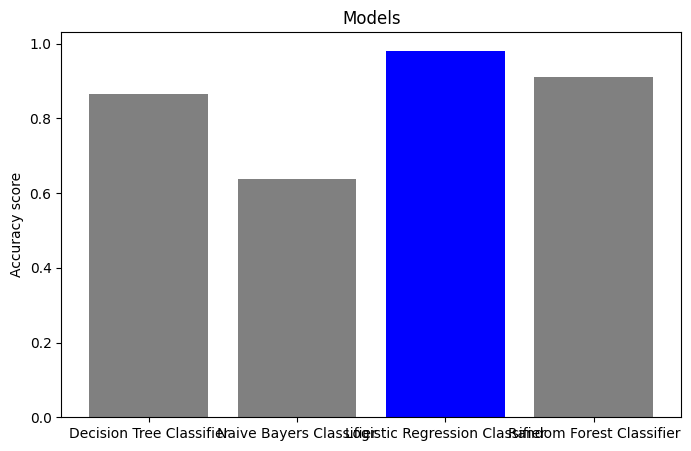

In [42]:
plt.figure(figsize=(8,5))
plt.xticks(y_pos,models)
plt.ylabel('Accuracy score')
plt.title('Models')
plt.bar(y_pos,n,color=highlights)

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm1 = confusion_matrix(Y_test,y_pred_decisionT)
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(cm1,
                 annot=True,
                 cmap = 'Blues',
                 fmt = 'd')
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")


cm2 = confusion_matrix(Y_test,y_pred_nvb)
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(cm2,
                 annot=True,
                 cmap = 'Blues',
                 fmt = 'd')
plt.title("Confusion Matrix for Naive Bayers Classifier")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")



cm3 = confusion_matrix(Y_test,y_pred_log)
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(cm3,
                 annot=True,
                 cmap = 'Blues',
                 fmt = 'd')
plt.title("Confusion Matrix for Logistic Regression Classifier")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")


cm4 = confusion_matrix(Y_test,y_pred_rand)
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(cm4,
                 annot=True,
                 cmap = 'Blues',
                 fmt = 'd')
plt.title("Confusion Matrix for Random Forest Classifier ")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")


ModuleNotFoundError: No module named 'seaborn'

In [44]:
from sklearn import tree

In [45]:
column_names = dataset2.iloc[:,0:33].columns
column_names

Index(['price', 'size_in_sqft', 'price_per_sqft', 'no_of_bedrooms',
       'no_of_bathrooms', 'maid_room', 'unfurnished', 'balcony',
       'barbecue_area', 'built_in_wardrobes', 'central_ac',
       'childrens_play_area', 'childrens_pool', 'concierge', 'covered_parking',
       'kitchen_appliances', 'lobby_in_building', 'maid_service', 'networked',
       'pets_allowed', 'private_garden', 'private_gym', 'private_jacuzzi',
       'private_pool', 'security', 'shared_gym', 'shared_pool', 'shared_spa',
       'study', 'vastu_compliant', 'view_of_landmark', 'view_of_water',
       'walk_in_closet'],
      dtype='object')

In [46]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from sklearn.tree import export_graphviz
import graphviz

In [48]:
#plot the decision tree

dot_data = tree.export_graphviz(model,out_file=None, feature_names=column_names, class_names=["High","Low","Medium","Ultra"],
                               filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('dtree_render', view=True)

'dtree_render.pdf'

# We selected the Logisitic Regression Classifier to move forward. 

In [50]:
import pickle
pickle.dump(model,open('Frontend/Model/model.pkl','wb'))


Step 5 - Predicting the quality, using a test data to check whether it gives the correct value.

In [ ]:
logistic_reg_classifier1.predict(sc.transform([[1845000,1000,1000,2,2,0,1,1,1,1,
                1,1,0,1,1,0,0,0,0,
                0,0,0,0,0,0,0,1,0,
                0,0,0,1,0]]))


array([2])

Step 6 - Model Evaluation

In [ ]:
model_training_accuracy = logistic_reg_classifier1.score(X_train,Y_train)
model_testing_accuracy = logistic_reg_classifier1.score(X_test,Y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True)
cross_val_score = cross_val_score(model, X, Y, cv=cv)


In [ ]:
print(f'Selected Logistic Regression Classification Training Accuracy: {model_training_accuracy}')
print(f'Selected Logistic Regression Classification  Testing Accuracy:{model_testing_accuracy}')
print(f'Selected Logistic Regression Classification Cross-Val Score:{cross_val_score}')

Selected Logistic Regression Classification Training Accuracy: 0.9993438320209974
Selected Logistic Regression Classification  Testing Accuracy:0.9816272965879265
Selected Logistic Regression Classification Cross-Val Score:[0.87926509 0.86351706 0.85826772 0.90026247 0.88188976]


In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(Y_test,y_pred_rand)
print(classification_report(Y_test,y_pred_rand))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.92      0.88      0.90       115
           2       0.91      0.95      0.93       221
           3       0.94      0.94      0.94        17

    accuracy                           0.91       381
   macro avg       0.90      0.88      0.89       381
weighted avg       0.91      0.91      0.91       381



In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, Y_train)

In [ ]:

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))